# Machine Learning Optimization 1: 

The purpose of this notebook is to optimize the models run in ML_final_analysis by changing the Feature set. 

**Feature Engineering**
We will create the feature set with
* total_restaurants
* total_reviews
* num_rest_categories
* all the stars ratio: 
    - ratio_stars_1.0
    - ratio_stars_1.5
    - ratio_stars_2.0
    - ratio_stars_2.5
    - ratio_stars_3.0
    - ratio_stars_3.5
    - ratio_stars_4.0
    - ratio_stars_4.5
    - ratio_stars_5.0'

The rationale behind this approach is because we saw when we ran the random forest classifier in ML_final_analysis, that these features were given the highest importance 

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, classification_report
from sklearn.metrics import balanced_accuracy_score
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [33]:
#Read in the CSV and read in the data
df = pd.read_csv("../Neighborhood/2tiers_county_categories.csv")

In [34]:
df.head()

,postal_code,City,State,CountyName,2021,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types,bars_stars,newamerican_stars,wine_bars_stars,italian_stars,tapasmallplates_stars,pizza_stars,breakfast_brunch_stars,mexican_stars,mediterranean_stars,sandwiches_stars,pubs_stars,breweries_stars,cajun_stars,seafood_stars,desserts_stars,cafes_stars,venezuelan_stars,coffee_stars,comfortfood_stars,tradamerican_stars,cocktailbars_stars,bagels_stars,salad_stars,burgers_stars,korean_stars,chicken_wings_stars,french_stars,fishnchips_stars,asianfusion_stars,ramen_stars,hotdogs_stars,filipino_stars,beerbar_stars,irish_stars,mideastern_stars,japanese_stars,thai_stars,chinese_stars,vietnamese_stars,bbq_stars,gastropubs_stars,noodles_stars,sushi_stars,himalayan_stars,indpak_stars,chickenshop_stars,australian_stars,brazilian_stars,japacurry_stars,brewpubs_stars,hotdog_stars,tex-mex_stars,conveyorsushi_stars,sportsbars_stars,modern_european_stars,georgian_stars,vegan_stars,southern_stars,turkish_stars,kebab_stars,steak_stars,scandinavian_stars,colombian_stars,juicebars_stars,cupcakes_stars,caribbean_stars,creperies_stars,falafel_stars,greek_stars,tacos_stars,uzbek_stars,latin_stars,bakeries_stars,hawaiian_stars,diners_stars,popuprestaurants_stars,scottish_stars,vegetarian_stars,soup_stars,kosher_stars,dimsum_stars,cantonese_stars,beergardens_stars,szechuan_stars,whiskeybars_stars,spanish_stars,portuguese_stars,southafrican_stars,hotpot_stars,puertorican_stars,tapas_stars,malaysian_stars,singaporean_stars,wraps_stars,waffles_stars,lebanese_stars,bubbletea_stars,taiwanese_stars,raw_food_stars,halal_stars,gluten_free_stars,delis_stars,cuban_stars,german_stars,argentine_stars,beer_and_wine_stars,gaybars_stars,pancakes_stars,donuts_stars,supperclubs_stars,foodtrucks_stars,poke_stars,peruvian_stars,russian_stars,british_stars,indonesian_stars,icecream_stars,pastashops_stars,shavedice_stars,gourmet_stars,cideries_stars,panasian_stars,brasseries_stars,empanadas_stars,irish_pubs_stars,polish_stars,divebars_stars,pakistani_stars,izakaya_stars,hainan_stars,ukrainian_stars,soulfood_stars,cheesesteaks_stars,newmexican_stars,persian_stars,tikibars_stars,gelato_stars,tuscan_stars,themedcafes_stars,eatertainment_stars,moroccan_stars,foodstands_stars,salvadoran_stars,dominican_stars,drivethrubars_stars,smokehouse_stars,african_stars,buffets_stars,diyfood_stars,streetvendors_stars,shanghainese_stars,tea_stars,cakeshop_stars,teppanyaki_stars,haitian_stars,afghani_stars,customcakes_stars,honduran_stars,austrian_stars,srilankan_stars,burmese_stars,wineries_stars,hkcafe_stars,mongolian_stars,fondue_stars,acaibowls_stars,ethiopian_stars,meaderies_stars,armenian_stars,pianobars_stars,cheese_stars,coffeeroasteries_stars,basque_stars,somali_stars,sicilian_stars,distilleries_stars,laotian_stars,egyptian_stars,pretzels_stars,internetcafe_stars,macarons_stars,cambodian_stars,belgian_stars,eritrean_stars,champagne_bars_stars,nicaraguan_stars,poutineries_stars,speakeasies_stars,syrian_stars,arabian_stars,polynesian_stars,catalan_stars,trinidadian_stars,hungarian_stars,calabrian_stars,czech_stars,guamanian_stars,sardinian_stars,senegalese_stars,bangladeshi_stars,bulgarian_stars,kombucha_stars,iberian_stars,piadina_stars,vermouthbars_stars,shavedsnow_stars,pubfood_stars,bistros_stars,modern_australian_stars,rotisserie_chicken_stars,slovakian_stars,bars,newamerican,wine_bars,italian,tapasmallplates,pizza,breakfast_brunch,mexican,mediterranean,sandwiches,pubs,breweries,cajun,seafood,desserts,cafes,venezuelan,coffee,comfortfood,tradamerican,cocktailbars,bagels,salad,burgers,korean,chicken_wings,french,fishnchips,asianfusion,ramen,hotdogs,filipino,beerbar,irish,mideastern,japanese,thai,chinese,vietnamese,bbq,gastropubs,

In [35]:
df.shape

(13988, 451)

In [36]:
df.City.value_counts()

New York                       178
Houston                        107
Los Angeles                    100
Chicago                         56
San Antonio                     56
Dallas                          51
Phoenix                         48
Austin                          48
Philadelphia                    47
Columbus                        46
Las Vegas                       46
Kansas City                     43
Washington                      40
Louisville                      39
Jacksonville                    37
Springfield                     36
Oklahoma City                   35
Indianapolis                    35
Portland                        34
San Diego                       34
Arlington                       33
Omaha                           32
Denver                          32
Cleveland                       32
Jackson                         32
Nashville                       32
Detroit                         31
Lexington                       30
San Jose            

In [ ]:
#df_ml = df.groupby('City').filter(lambda x : len(x)>=10)
#df_ml.shape

In [37]:
df.columns.to_list()

['postal_code',
 'City',
 'State',
 'CountyName',
 '2021',
 'total_restaurants',
 'total_reviews',
 'avg_rating',
 'total_delivery',
 'total_pickup',
 'total_rest_reservation',
 'total_price_1',
 'total_price_2',
 'total_price_3',
 'total_price_4',
 'total_0.0_stars',
 'total_1.0_stars',
 'total_1.5_stars',
 'total_2.0_stars',
 'total_2.5_stars',
 'total_3.0_stars',
 'total_3.5_stars',
 'total_4.0_stars',
 'total_4.5_stars',
 'total_5.0_stars',
 'num_rest_types',
 'bars_stars',
 'newamerican_stars',
 'wine_bars_stars',
 'italian_stars',
 'tapasmallplates_stars',
 'pizza_stars',
 'breakfast_brunch_stars',
 'mexican_stars',
 'mediterranean_stars',
 'sandwiches_stars',
 'pubs_stars',
 'breweries_stars',
 'cajun_stars',
 'seafood_stars',
 'desserts_stars',
 'cafes_stars',
 'venezuelan_stars',
 'coffee_stars',
 'comfortfood_stars',
 'tradamerican_stars',
 'cocktailbars_stars',
 'bagels_stars',
 'salad_stars',
 'burgers_stars',
 'korean_stars',
 'chicken_wings_stars',
 'french_stars',
 'fish

# Feature Engineering

In [6]:
#Drop counties that have less than 10 zipcodes
df = df.groupby('CountyName').filter(lambda x : len(x)>10)
df.shape

(9952, 451)

### Create Scaled Training and Test data

# Create the features
#X = df.drop(columns=['postal_code',
 'City',
 'State',
 'CountyName',
 '2021',
 'total_price_1',
 'total_price_2',
 'total_price_3',
 'total_price_4',
 'total_0.0_stars',
 'total_1.0_stars',
 'total_1.5_stars',
 'total_2.0_stars',
 'total_2.5_stars',
 'total_3.0_stars',
 'total_3.5_stars',
 'total_5.0_stars',
 'num_rest_types',
'Average County House Price','Neighborhood Indicator','Neighborhood Tiers'], axis=1)
X.head()

In [39]:
X = df[['total_restaurants',
 'total_reviews',
 'avg_rating',
 'total_delivery',
 'total_pickup',
 'total_rest_reservation',
 'total_price_1',
 'total_price_2',
 'total_price_3',
 'total_price_4',
 'total_0.0_stars',
 'total_1.0_stars',
 'total_1.5_stars',
 'total_2.0_stars',
 'total_2.5_stars',
 'total_3.0_stars',
 'total_3.5_stars',
 'total_4.0_stars',
 'total_4.5_stars',
 'total_5.0_stars',
 'num_rest_types']]
X.head()

,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types
0,23,1347.0,3.782609,1.0,2.0,0.0,4.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,5.0,11.0,3.0,1.0,23
1,1,2.0,4.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
2,34,6364.0,3.926471,31.0,20.0,1.0,0.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,17.0,5.0,1.0,34
3,5,708.0,4.200000,4.0,3.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0,9
4,3,231.0,4.000000,3.0,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,5


In [40]:
X.describe()

,total_restaurants,total_reviews,avg_rating,total_delivery,total_pickup,total_rest_reservation,total_price_1,total_price_2,total_price_3,total_price_4,total_0.0_stars,total_1.0_stars,total_1.5_stars,total_2.0_stars,total_2.5_stars,total_3.0_stars,total_3.5_stars,total_4.0_stars,total_4.5_stars,total_5.0_stars,num_rest_types
count,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000,13988.000000
mean,17.199671,2292.623820,3.846332,10.853732,5.911353,0.170646,5.090506,6.737275,0.444524,0.081355,0.004575,0.308979,0.350944,0.650129,0.949028,1.567129,3.057120,5.144838,3.739777,1.427152,16.246997
std,23.206327,7266.146878,0.593484,18.896210,12.032094,0.757304,7.673213,11.123103,1.571215,0.527463,0.067489,0.849116,0.978653,1.536239,2.042458,2.765856,4.820087,8.320511,5.858968,2.067337,15.550423
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,3.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,8.000000,229.000000,3.928571,1.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,1.000000,11.000000
75%,23.000000,1560.000000,4.192308,14.000000,7.000000,0.000000,7.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,4.000000,6.000000,5.000000,2.000000,25.000000
max,230.000000,272071.000000,5.000000,189.000000,163.000000,19.000000,72.000000,110.000000,37.000000,29.000000,1.000000,11.000000,18.000000,20.000000,22.000000,30.000000,51.000000,105.000000,90.000000,29.000000,96.000000


In [41]:
#Create target variable
y = df['Neighborhood Tiers']
y.head()

0    1
1    1
2    1
3    2
4    2
Name: Neighborhood Tiers, dtype: int64

In [42]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)
print(f"y_train: {Counter(y_train)}")
print(f"y_test: {Counter(y_test)}")


y_train: Counter({2: 5337, 1: 5154})
y_test: Counter({2: 1794, 1: 1703})


In [43]:
# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [44]:
X_train_scaled[:, 2]

array([-0.62087254, -0.36771539,  0.25730419, ...,  0.4680666 ,
        1.9434035 , -0.58574547])

In [45]:
X_test_scaled[:,2]

array([-0.7543554 , -1.42879513, -3.11489444, ..., -1.14777857,
       -1.21803271,  0.25730419])

# Create a logistic regression model

In [46]:
# Logistic Regression
classifier_LR = LogisticRegression(solver='lbfgs', random_state=1, max_iter = 200)
classifier_LR

LogisticRegression(max_iter=200, random_state=1)

In [47]:
# Train the data
classifier_LR.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [48]:
# Predict outcomes for test data set
y_pred_LR = classifier_LR.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_LR, "Actual": y_test}).head(20)

,Prediction,Actual
10749,2,1
5325,1,2
9498,2,2
1923,1,1
307,1,1
11541,2,2
11857,1,2
3548,2,2
12723,2,2
10082,2,2


In [49]:
#Calculate the Balanced Accuracy score
y_pred = classifier_LR.predict(X_test_scaled)
acc_LR = accuracy_score(y_test, y_pred_LR)
acc_LR

0.6028024020589077

In [50]:
#calculate Mean Squared Error
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

0.3971975979410924

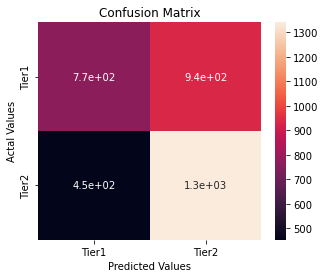

In [51]:
# Display the confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_LR = pd.DataFrame(cm_LR,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_LR, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [52]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           1       0.63      0.45      0.52      1703
           2       0.59      0.75      0.66      1794

    accuracy                           0.60      3497
   macro avg       0.61      0.60      0.59      3497
weighted avg       0.61      0.60      0.59      3497



# Create Balanced Random Forest Classifier

In [53]:
# Resample the training data with the BalancedRandomForestClassifier
model_RF = BalancedRandomForestClassifier(n_estimators=50, random_state=1) 
model_RF.fit(X_train_scaled, y_train)

BalancedRandomForestClassifier(n_estimators=50, random_state=1)

In [54]:
# Calculated the balanced accuracy score
y_pred_RF = model_RF.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_RF)


0.5844587981992562

In [55]:
#calculate Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
mse_RF

0.416070917929654

In [56]:
pd.DataFrame({"Prediction": y_pred_RF, "Actual": y_test}).head(20)

,Prediction,Actual
10749,1,1
5325,2,2
9498,2,2
1923,1,1
307,1,1
11541,2,2
11857,1,2
3548,2,2
12723,2,2
10082,2,2


In [57]:
# Calculate feature importance in the Random Forest model.
importances = model_RF.feature_importances_
importances

array([0.0606918 , 0.19753178, 0.09440272, 0.05662828, 0.04803907,
       0.00855102, 0.06369483, 0.06072938, 0.0188509 , 0.00583365,
       0.00073721, 0.014669  , 0.01322293, 0.01922988, 0.02351795,
       0.03434517, 0.04213402, 0.05308959, 0.0480174 , 0.03826908,
       0.09781433])

In [58]:
# We can sort the features by their importance.
sorted(zip(model_RF.feature_importances_, X.columns), reverse=True)


[(0.19753177942896202, 'total_reviews'),
 (0.0978143345604418, 'num_rest_types'),
 (0.09440272434600219, 'avg_rating'),
 (0.06369482851411852, 'total_price_1'),
 (0.06072938118123906, 'total_price_2'),
 (0.06069179624697024, 'total_restaurants'),
 (0.056628280099829516, 'total_delivery'),
 (0.053089587291237555, 'total_4.0_stars'),
 (0.04803907066814987, 'total_pickup'),
 (0.04801739688492516, 'total_4.5_stars'),
 (0.04213402332219341, 'total_3.5_stars'),
 (0.03826908442961299, 'total_5.0_stars'),
 (0.03434516841571224, 'total_3.0_stars'),
 (0.023517950355724616, 'total_2.5_stars'),
 (0.01922988339383208, 'total_2.0_stars'),
 (0.018850895630594562, 'total_price_3'),
 (0.014669003041543303, 'total_1.0_stars'),
 (0.013222932734169612, 'total_1.5_stars'),
 (0.00855101875637349, 'total_rest_reservation'),
 (0.005833654006584493, 'total_price_4'),
 (0.000737206691783244, 'total_0.0_stars')]

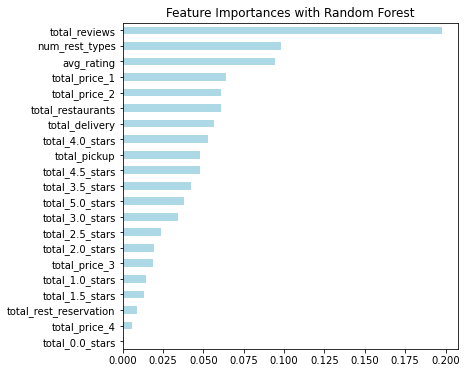

In [79]:
# Plot influential features based on Random Forest model:
influential_features = pd.Series(model_RF.feature_importances_, X.columns)
influential_features.nlargest(30).sort_values().plot(kind='barh', color='lightblue', figsize=(6,6))
plt.title('Feature Importances with Random Forest');


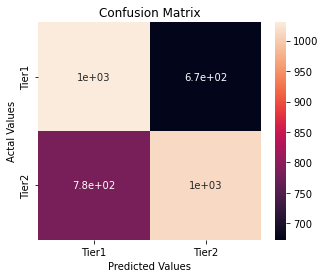

In [60]:
# Display the confusion matrix
cm_RF = confusion_matrix(y_test, y_pred_RF)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_RF = pd.DataFrame(cm_RF,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_RF, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [61]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           1       0.57      0.60      0.59      1703
           2       0.60      0.56      0.58      1794

    accuracy                           0.58      3497
   macro avg       0.58      0.58      0.58      3497
weighted avg       0.58      0.58      0.58      3497



# Create Easy Ensemble AdaBoost Classifier

In [62]:
# Train the EasyEnsembleClassifier
model_Ada = EasyEnsembleClassifier(n_estimators=75, random_state=1) 
model_Ada.fit(X_train_scaled, y_train)

EasyEnsembleClassifier(n_estimators=75, random_state=1)

In [63]:
# Calculated the balanced accuracy score
y_pred_Ada = model_Ada.predict(X_test_scaled)

balanced_accuracy_score(y_test, y_pred_Ada)

0.6056554077629417

In [64]:
pd.DataFrame({"Prediction": y_pred_Ada, "Actual": y_test}).head(10)

,Prediction,Actual
10749,2,1
5325,1,2
9498,2,2
1923,1,1
307,1,1
11541,2,2
11857,1,2
3548,2,2
12723,2,2
10082,1,2


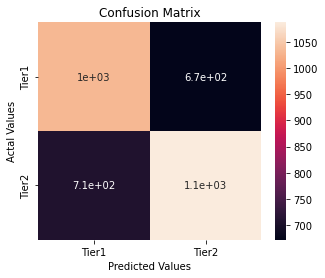

In [65]:
# Display the confusion matrix
cm_Ada = confusion_matrix(y_test, y_pred_Ada)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_Ada = pd.DataFrame(cm_Ada,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])
#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_Ada, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [66]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_Ada))

              precision    recall  f1-score   support

           1       0.59      0.61      0.60      1703
           2       0.62      0.61      0.61      1794

    accuracy                           0.61      3497
   macro avg       0.61      0.61      0.61      3497
weighted avg       0.61      0.61      0.61      3497



# Create Gradient Boosting Classifier

In [67]:
# Create a classifier object
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                            learning_rate=learning_rate,
                                            max_features=5,
                                            max_depth=3,
                                            random_state=0)
    # Fit the model
    classifier_GBC.fit(X_train_scaled, y_train)
    print("Learning rate: ", learning_rate)

    # Score the model
    print("Accuracy score (training): {0:.3f}".format(
        classifier_GBC.score(
            X_train_scaled,
            y_train)))
    print("Accuracy score (validation): {0:.3f}".format(
        classifier_GBC.score(
            X_test_scaled,
            y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.593
Accuracy score (validation): 0.595

Learning rate:  0.1
Accuracy score (training): 0.599
Accuracy score (validation): 0.600

Learning rate:  0.25
Accuracy score (training): 0.614
Accuracy score (validation): 0.608

Learning rate:  0.5
Accuracy score (training): 0.622
Accuracy score (validation): 0.607

Learning rate:  0.75
Accuracy score (training): 0.622
Accuracy score (validation): 0.603

Learning rate:  1
Accuracy score (training): 0.622
Accuracy score (validation): 0.600



In [68]:
# Choose a learning rate and create classifier
classifier_GBC = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=0.75,
                                        max_features=10,
                                        max_depth=5,
                                        random_state=0)

# Fit the model
classifier_GBC.fit(X_train_scaled, y_train)

# Make Prediction
y_pred_GBC = classifier_GBC.predict(X_test_scaled)
pd.DataFrame({"Prediction": y_pred_GBC, "Actual": y_test}).head(20)

,Prediction,Actual
10749,2,1
5325,1,2
9498,2,2
1923,1,1
307,1,1
11541,2,2
11857,1,2
3548,2,2
12723,2,2
10082,2,2


In [69]:
accuracy_score(y_test, y_pred_GBC)

0.597655132971118

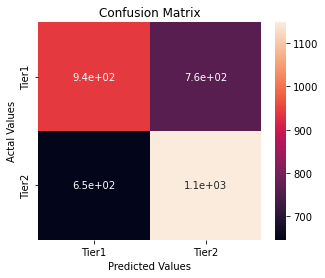

In [70]:
cm_GBC = confusion_matrix(y_test, y_pred_GBC)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_GBC = pd.DataFrame(cm_GBC,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_GBC, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [71]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_GBC))


              precision    recall  f1-score   support

           1       0.59      0.55      0.57      1703
           2       0.60      0.64      0.62      1794

    accuracy                           0.60      3497
   macro avg       0.60      0.60      0.60      3497
weighted avg       0.60      0.60      0.60      3497



# Naive Bayes model

In [72]:
from sklearn.naive_bayes import GaussianNB
classifiers_bayes = GaussianNB()
classifiers_bayes.fit(X_train_scaled, y_train)

GaussianNB()

In [73]:
y_pred_bayes  =  classifiers_bayes.predict(X_test_scaled)

In [74]:
pd.DataFrame({"Prediction": y_pred_bayes, "Actual": y_test}).head(20)

,Prediction,Actual
10749,2,1
5325,2,2
9498,2,2
1923,2,1
307,2,1
11541,2,2
11857,2,2
3548,2,2
12723,2,2
10082,2,2


In [75]:
# Calculating the accuracy score
acc_score_bayes = accuracy_score(y_test, y_pred_bayes)
print(f"Accuracy Score : {acc_score_bayes}")

Accuracy Score : 0.536745782098942


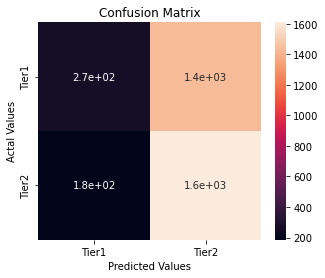

In [76]:
cm_bayes = confusion_matrix(y_test, y_pred_bayes)
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df_bayes = pd.DataFrame(cm_bayes,
                     index = ['Tier1','Tier2'], 
                     columns = ['Tier1','Tier2'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_bayes, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [77]:
# Print the imbalanced classification report
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           1       0.59      0.16      0.25      1703
           2       0.53      0.90      0.67      1794

    accuracy                           0.54      3497
   macro avg       0.56      0.53      0.46      3497
weighted avg       0.56      0.54      0.46      3497



In [78]:
# print the accuracy score of each model:
print('----------------------------------------')
print('Accuracy')
print('----------------------------------------')
print('Naive Bayes Test Accuracy: ', accuracy_score(y_test, y_pred_bayes)*100,'%')
print('Random Forest Test Accuracy: ', accuracy_score(y_test, y_pred_RF)*100,'%')
print('Adaboost Test Accuracy: ', accuracy_score(y_test, y_pred_Ada)*100,'%')
print('Gradient Boost Test Accuracy: ', accuracy_score(y_test, y_pred_GBC)*100,'%')
print('Logistic Regession Test Accuracy: ', accuracy_score(y_test, y_pred_LR)*100,'%')

# Print the F1 score of each model:
print('\n----------------------------------------')    
print('Weighted F1 Score')
print('----------------------------------------')
print('Naive Bayes F1 Score: ', f1_score(y_test, y_pred_bayes, average='weighted'))
print('Random Forest F1 Score: ', f1_score(y_test, y_pred_RF, average='weighted'))
print('Adaboost F1 Score: ', f1_score(y_test, y_pred_Ada, average='weighted'))
print('Gradient Boost F1 Score: ', f1_score(y_test, y_pred_GBC, average='weighted'))
print('Logistic Regession F1 Score: ', f1_score(y_test, y_pred_LR, average='weighted'))


----------------------------------------
Accuracy
----------------------------------------
Naive Bayes Test Accuracy:  53.6745782098942 %
Random Forest Test Accuracy:  58.3929082070346 %
Adaboost Test Accuracy:  60.56619959965685 %
Gradient Boost Test Accuracy:  59.7655132971118 %
Logistic Regession Test Accuracy:  60.28024020589077 %

----------------------------------------
Weighted F1 Score
----------------------------------------
Naive Bayes F1 Score:  0.4622994076218538
Random Forest F1 Score:  0.5838623266390811
Adaboost F1 Score:  0.605725214589453
Gradient Boost F1 Score:  0.5968729975914742
Logistic Regession F1 Score:  0.5935482694430827
